<center><h1>Making Merger Tree from m3p output</h1></center>

In [2]:
import numpy as np
import m3p_merger
import matplotlib.pyplot as plt
import importlib
import matplotlib
importlib.reload(m3p_merger)

<module 'm3p_merger' from 'C:\\Users\\David\\Google Drive\\Axion PhD\\PeakPatch\\m3p_merger\\m3p_merger.py'>

In [3]:
Omega_m0 = 0.3
Omega_r0 = 8.486e-5
h = 0.7

G = 6.674e-11 # m^3 kg^(-1) s^(-2)
Mpc = 3.086e22 # m 
Msol = 1.988e30 # kg
Mpcpkm = (1e3/3.0869e22)
H = 100*Mpcpkm*h # /s
Omega_DM = 0.267

rho_c = 3/(8*np.pi*G)*Mpc**3/Msol*H**2 # Msol / Mpc^(-3)
rho_bg = 0.267*rho_c

z_eq = Omega_m0/Omega_r0 - 1
a_eq = 1/(1+z_eq)


In [4]:
#ppFile = pathPrefix+"../inputs/"+"inputs.ax_manyz"
ppFile = "inputs.axbig_manyz3"
peak_list, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, printOutput = True)

C:\Users\David\Google Drive\Axion PhD\PeakPatch\m3p_merger\utils.py:14: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(fname) as f:


	Loading file (109 of 109): axOut/big3/axion_big3final_halos_108.hdf5


In [5]:
peak_list.shape

(109,)

<h2><center>Find which trees are interesting</center></h2>

In [7]:
out = m3p_merger.BuildMergerTree(peak_list, ppFile, redshift_indicies='all')

In [11]:
for i in range(len(out)):
    mass = out[i][0][0][-1]
    mask = (mass>1e-12)*(mass<1e-11)
    if mask:
        print(i, end = ' ')
    

30 63 120 153 403 443 451 592 600 637 960 1281 1290 1556 1647 1696 1760 1776 1791 1914 1917 2038 2080 2273 2379 2453 2455 2552 2652 2676 2707 2735 2821 2923 3017 3046 3140 3151 3248 3305 3395 3571 3572 3616 3668 3695 3720 3723 3729 3836 3841 3842 3860 3907 3937 3993 4026 4066 4112 4124 4140 4159 4167 4361 4395 4428 4514 4530 4553 4593 4605 4722 4816 4835 4859 4984 5075 5117 5143 5263 5451 5464 5556 5624 5730 5773 5855 5914 5915 5960 6027 6029 6134 6312 6605 6637 6719 6914 6921 7176 7289 7297 7428 7485 7635 7642 7660 7723 7724 7861 7877 7914 7956 7985 8013 8064 8072 8073 8301 8405 8482 8496 8529 8584 8591 8635 8681 8709 8720 8743 8777 8812 8833 9009 9030 9046 9054 9058 9304 9315 9316 9467 9534 9573 9606 9678 9691 9694 9750 9889 9970 10080 10114 10129 10154 10196 10214 10233 10239 10250 10268 10363 10443 10697 10758 10794 10817 10916 11014 11058 11070 11102 11138 11148 11162 11457 11588 11598 11731 11837 11873 11886 11950 12049 12083 12084 12242 12275 12276 12289 12310 12354 12411 12436 

<h2><center>Calculate Merger Tree</center></h2>

In [15]:
importlib.reload(m3p_merger)
#indicies = np.arange(1000)
out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 12)
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out[0])

KeyboardInterrupt: 

In [10]:
importlib.reload(m3p_merger)
out2 = m3p_merger.BuildMergerTree2(peak_list, ppFile, final_halos_indicies = 12)

<h2><center>Plot all peaks on each other</center></h2>

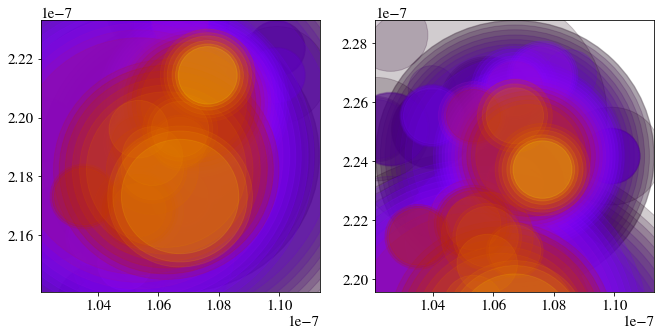

In [68]:
importlib.reload(m3p_merger)
#out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 797, printOutput = True)
m3p_merger.plotMergerPatches(out2[0], ppFile)

<h2><center>Plot merger tree</center></h2>

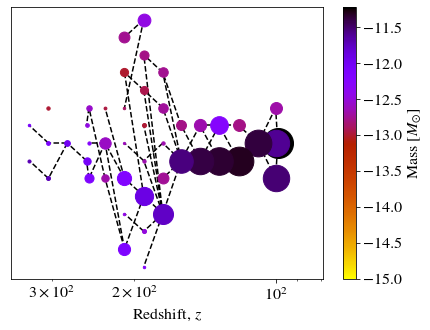

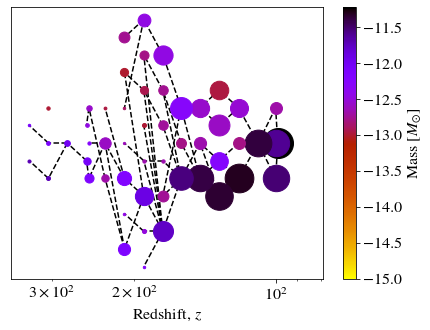

In [38]:
importlib.reload(m3p_merger)
ppFile = "inputs.axbig_manyz3"

index = 30 

out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = index)
fig = m3p_merger.plotMergerTree(out[0][::5], ppFile, startIndex=0, font_size = 16, log = True,
                          colorbar=True, colorbar_title = "Mass [$M_{\odot}$]", min_mass = 1e-13)
plt.show()

out2 = m3p_merger.BuildMergerTree2(peak_list, ppFile, final_halos_indicies = index)
fig = m3p_merger.plotMergerTree(out2[0][::5], ppFile, startIndex=0, font_size = 16, log = True,
                          colorbar=True, colorbar_title = "Mass [$M_{\odot}$]", min_mass = 1e-13)

<h3>Checking Linear Interpolation</h3>

(10000.0, 90)

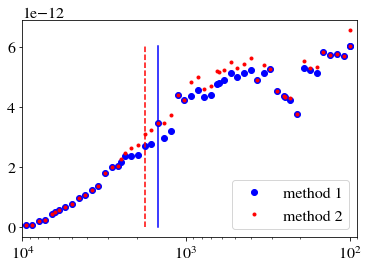

In [13]:
importlib.reload(m3p_merger)

halo_index = index
f = 0.01

out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = halo_index)
#zColLin, ProgMassLin, zLin = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 25, interp = "Linear")
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 0, interp = "None")
plt.semilogx(z, ProgMass, 'bo', ms=6, label = "method 1")

#plt.semilogx([zColLin, zColLin], [0,ProgMassLin[0]],'k-')
plt.semilogx([zCol, zCol], [0,ProgMass[0]],'b-')

plt.xlim(1e4, z[0])

out = m3p_merger.BuildMergerTree2(peak_list, ppFile, final_halos_indicies = halo_index)
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 0, interp = "None")
plt.semilogx(z, ProgMass, 'r.', ms=6, label ="method 2")

plt.semilogx([zCol, zCol], [0,ProgMass[0]],'r--')

plt.legend(loc=4)
plt.xlim(1e4, 90)


#np.save("./FinalGraphs/Data/MassGrowth.npy", [z, ProgMass, zCol])

In [19]:
importlib.reload(m3p_merger)
ppFile = "inputs.axbig_manyz3"

frac = 0
startIndicies = [0, 25, 50, 74]

for i, startIndex in enumerate(startIndicies):  
    z0 = np.logspace(2,6,100)[startIndex]
    
    print("-"*40)
    print("Calculating collapse redshifts\n   ppFile: {}\n   z0={:.3}\n".format(ppFile, z0))
    
    print("Building peak list...")
    peak_list, boxsize = m3p_merger.MakePeakList(ppFile, startIndex = startIndex, printOutput = True)
    print("Done.\n")

    print("Building merger trees...")
    out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = "all", printOutput = True)
    print("Done.\n")

    print("Calculating collapse redshifts...")
    collapse_redshifts = np.zeros(len(out))
    for i in range(len(out)):
        collapse_redshifts[i] = m3p_merger.FindCollapseRedshift(out[i], frac, ppFile, interp = "None")[0]
    print("Done.\n")

    print("Fetching final halo masses...")
    masses = np.zeros(len(out))
    for i in range(len(out)):
        masses[i] = out[i][0][0,4]
    print("Done.\n")

    print("Fetching final halo radii...")
    radii = np.zeros(len(out))
    for i in range(len(out)):
        radii[i] = out[i][0][0,3]
    print("Done.\n")

    print("Saving data...")
    np.save("ConcEvolution/axbig_manyz_CollapseRedshifts_f0_z0_{}".format(z0), collapse_redshifts)
    np.save("ConcEvolution/axbig_manyz_FinalMasses_f0_z0_{}".format(z0), masses)
    np.save("ConcEvolution/axbig_manyz_FinalRadii_f0_z0_{}".format(z0), radii)
    print("Done.\n")

----------------------------------------
Calculating collapse redshifts
   ppFile: inputs.axbig_manyz
   z0=1e+02

Building peak list...
	Loading file (100 of 100): axOut/axionfinal_halos_99.hdf5
Done.

Building merger trees...
	Final redshift index 99 out of 100
	i.e. Earlist halo at z = 1000000.0
	Halo 3110 of 3111: 99 complete of 99
Done.

Calculating collapse redshifts...
Done.

Fetching final halo masses...
Done.

Fetching final halo radii...
Done.

Saving data...
Done.

----------------------------------------
Calculating collapse redshifts
   ppFile: inputs.axbig_manyz
   z0=1.02e+03

Building peak list...
	Loading file (75 of 75): axOut/axionfinal_halos_99.hdf5
Done.

Building merger trees...
	Final redshift index 74 out of 75
	i.e. Earlist halo at z = 97700.0
	Halo 125458 of 125459: 74 complete of 74
Done.

Calculating collapse redshifts...
Done.

Fetching final halo masses...
Done.

Fetching final halo radii...
Done.

Saving data...
Done.

------------------------------------